# Анализа текстуалних података

Податке које генеришемо и/ли желимо да обрадимо и анализирамо често су у текстуалном формату (помислите на текстове закона, текстове порука размењених на друштвеним мрежама, извештаје лекара,...). Из овог разлога, јако је битно да се бар дотакнемо анализе текстуалних података у овом сегменту. Ова област анализе података је изузетно велика и активна (нове методе и алгоритми генеришу се готово на дневном нивоу), те не претендујемо да овде одговоримо на сва питања у вези са текстом. Циљ је да отворимо нека питања и понудимо неке од једноставних алата за анализе, али и да вас оставимо мотивисаним за даља истраживања ових тема.
У овој радној свесци користићемо претходно припремљене податке настале преузимањем текста са веб стране petlja.org и књиге Ана Карењина са платформe пројекта Гутенберг. Текст типично не долази у табеларној форми, али често (као што сте имали прилику да видите у неким другим радним свескама) колоне садрже различите текстуалне садржаје. У додатку, на крају приручника, налазе се радне свеске за преузимање текстова и књига са сајта, а прерађен, једнсотаван излаз тих свески су табеларни подаци за једноставан унос и анализу у овој и наредној свесци. У овој свесци наш циљ је да:
- урадимо фреквенцијску анализу слова у тексту и упоредимо која слова су и у којој мери заступљена у српском и енглеском тексту на исту тему
- урадимо фреквенцијску анализу речи и тиме идентификујемо неке од кључних тема којима се текст бави
- емпиријски истражимо везу између фреквенције речи у тексту и њеног ранга, такозвани Зипов закон

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cyrtranslit

## Кључне речи у текстовима са веба:

Кренућемо од анализе кратких текстова о фондацији Петља преузетих са сајта [petlja.org](petlja.org). Ово нам је интересантно зато што имамо исти текст и на српском и енглеском језику па можемо направити мало поређење дужина речи, заступљености различитих слова у различитим језицима. 

У фолдеру са подацима, налазе се и радне свеске коришћене за преузимање и пречишћавање ових текстова, а као продукт тог рада, овде учитавамо једноставне табеле речи настале од ових текстова:

In [2]:
petlja_rs = pd.read_csv('data/tekst data/petlja_srb_reci.csv')
petlja_en = pd.read_csv('data/tekst data/petlja_eng_reci.csv')
petlja_rs.head(2)

,Rec,Duzina_reci
0,Smatramo,8
1,da,2


In [3]:
petlja_en.head(2)

,Rec,Duzina_reci
0,We,2
1,believe,7


Видимо да обе табеле (у којима је текст на српском и на енглеском) поред индекса садрже колону у којој су све речи из текста и колону у којој су одговарајуће дужине речи. Можемо почети проверавајући колико се број речи разликује између ова два текста простим поређењем дужина ових табела:

In [4]:
(len(petlja_en),len(petlja_rs))

(578, 433)

Видимо да постоји разлика у дужини текстова ако посматрамо број речи, а можемо погледати и како стоје ствари ако поредимо дужине речи из одговоарајуће колоне користећи хистограме:

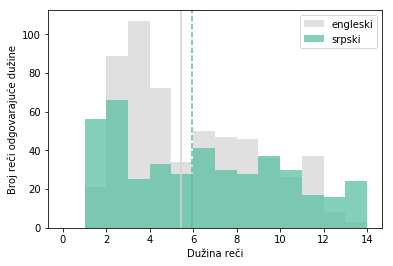

In [5]:
plt.hist(petlja_en['Duzina_reci'],bins=range(max(petlja_en['Duzina_reci'])),alpha=0.7,label='engleski',color='lightgrey')
plt.axvline(x=np.mean(petlja_en['Duzina_reci']),color='lightgrey')

plt.hist(petlja_rs['Duzina_reci'],bins=range(max(petlja_rs['Duzina_reci'])),alpha=0.7,label='srpski',color='#52bd9d') 
plt.axvline(x=np.mean(petlja_rs['Duzina_reci']),color='#52bd9d',linestyle='dashed') #вертикална линија која обележава просечну дужину речи

plt.xlabel('Dužina reči')
plt.ylabel('Broj reči odgovarajuće dužine')
plt.legend()
plt.show()

На дијаграму изнад представљено је колико се речи одговарајуће дужине може наћи у сваком од два текста (српски текст oбележен је тиркизном - кодом који одговара боји логао Петље, а енглески сивом бојом). Видимо да у оба језика постоје речи од једног до 13 карактера, али се заступљеност речи различитих дужина разликују (погледајте на пример речи дужине између до пет карактера), што за последицу има и да се просечна дужина речи у тексту разликује (означено вертикалним линијама).

Међутим, на дијаграму изнад смо посматрали само дужине речи из текста, где смо и речи које се појављују више пута, више пута уврстили, ако хоћемо да пребројимо јединствене речи коришћене у текстовима, морамо за почетак сва слова исписати малим словима, да бисмо и речи са почетака реченица лепо урачунали. Да бисмо то урадили, користимо функцију **apply** којом згодно можемо применити функцију на колону - елемент по елемент. У овом случају примењујемо функцију **str.lower** којом се сва слова у стрингу смањују:

In [6]:
petlja_en['Rec_malim_slovima'] = petlja_en['Rec'].apply(str.lower)
petlja_rs['Rec_malim_slovima'] = petlja_rs['Rec'].apply(str.lower)
petlja_rs.head(2)

,Rec,Duzina_reci,Rec_malim_slovima
0,Smatramo,8,smatramo
1,da,2,da


За бројање појављивања сваке од речи можемо искористити функцију **value_counts**:

In [7]:
petlja_rs['Rec_malim_slovima'].value_counts()[:10]

i                35
da               14
u                13
je               12
za                9
algoritamske      7
programiranja     7
pismenosti        7
su                6
se                6
Name: Rec_malim_slovima, dtype: int64

Исходе ових пребројавања можемо такође сачувати у одговарајуће табеле:

In [8]:
jedinstvene_reci_rs = pd.DataFrame(petlja_rs['Rec_malim_slovima'].value_counts())
jedinstvene_reci_en = pd.DataFrame(petlja_en['Rec_malim_slovima'].value_counts())
jedinstvene_reci_rs.head(2)

,Rec_malim_slovima
i,35
da,14


Колона са речима је индексна, па ћемо увесто опет стандардно индексирање редним бројевима функцијом **reset_index**, a затим ћемо и преименовати колоне функцијом **rename**:

In [9]:
jedinstvene_reci_rs = jedinstvene_reci_rs.reset_index()
jedinstvene_reci_rs.head(2)

,index,Rec_malim_slovima
0,i,35
1,da,14


In [10]:
jedinstvene_reci_rs = jedinstvene_reci_rs.rename(columns={'index':'Rec_malim_slovima','Rec_malim_slovima':'Broj_pojavljivanja_reci'})
jedinstvene_reci_rs.head(2)

,Rec_malim_slovima,Broj_pojavljivanja_reci
0,i,35
1,da,14


In [11]:
jedinstvene_reci_en = jedinstvene_reci_en.reset_index()
jedinstvene_reci_en = jedinstvene_reci_en.rename(columns={'index':'Rec_malim_slovima','Rec_malim_slovima':'Broj_pojavljivanja_reci'})

Уколико другачије није назначено опционим аргументом *sort* функција **value_counts** враћа сортиране резултате, у опадајућем редоследу. Хајде да видимо по 10 најчешћих речи у текстовима на оба језика:

In [12]:
jedinstvene_reci_rs[:10]

,Rec_malim_slovima,Broj_pojavljivanja_reci
0,i,35
1,da,14
2,u,13
3,je,12
4,za,9
5,algoritamske,7
6,programiranja,7
7,pismenosti,7
8,su,6
9,se,6


In [13]:
jedinstvene_reci_en[:10]

,Rec_malim_slovima,Broj_pojavljivanja_reci
0,the,36
1,and,32
2,of,21
3,to,17
4,a,16
5,for,15
6,that,13
7,in,10
8,is,9
9,algorithmic,9


На оба језика се у првих 10 речи поред разних везника, прилога, чланова и осталих речи које очекујемо у сваком тексту и које саме по себи не носе пуно значења, налазе и речи "алгоритамске", "писмености", "програмирања" и "algorithmic". Ако знате за Петљу, сигурно вас не чуди што су баш ове речи испливале на врх листе по популарности у тексту о Петљи. 

Сјајно је што једна овако једноставна анализа може дати кратки увид у неке од тема текста. Овде смо "на око" издвајали битне од небитних речи, али и то може бити аутоматизовано. Типично за различите језике постоје речници најфреквентијих речи, те се све анализе вашег текста могу фокусирати само на оне речи које су фреквентне у тексту који се истражује а нису фреквентне иначе. Наравно и оваква анализа има своја ограничења, на пример ако је у тексту кључни појам коришћен у различитим граматичким облицима или су коришћени различити синонима, то ће умањити број појављивањa, препознавање кључне речи ће нам вероватно промаћи.

## Заступљеност појединих слова у тексту

Сада ћемо погледати да ли се заступљеност појединих слова разликује у овим текстовима на различитим језицима. Прво ћемо спојити у један текст све речи које се налазе у колонама. То можемо урадити функцијом **join**:

In [14]:
razmak = ' '
tekst_en = razmak.join(petlja_en['Rec_malim_slovima'])
tekst_rs = razmak.join(petlja_rs['Rec_malim_slovima'])
tekst_rs[:100]

'smatramo da je razumevanje algoritama i umeće algoritamskog izražavanja potrebno svima a takođe je v'

Користећи функцију **count** за сваки од карактера можемо избројати појављивање свих слова, вредности ћемо сачувати у речник:

In [15]:
alphabet_en = 'abcdefghijklmnopqrstuvwxyz'
zastupljenost_slova_en=dict()
for ch in alphabet_en:
    zastupljenost_slova_en[ch]=tekst_en.count(ch)

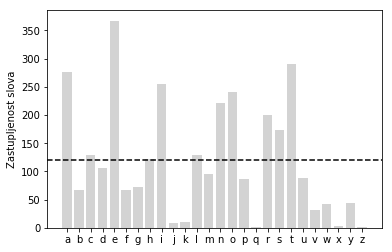

In [16]:
plt.bar(range(len(alphabet_en)),zastupljenost_slova_en.values(),color='lightgrey')
plt.xticks(range(len(alphabet_en)),zastupljenost_slova_en.keys())
prosecna_zastupljenost = sum(zastupljenost_slova_en.values())/len(alphabet_en)
plt.axhline(y = prosecna_zastupljenost,color = 'black',linestyle='dashed')
plt.ylabel('Zastupljenost slova')
plt.show()

Како у тексту на српском са латиничним писмом имамо и двокарактерна слова, превешћемо прво текст у ћириличо писмо па тек онда извршити пребројавање. Преписивање текста у ћирилично писмо лако радимо користећи библиотеку *cyrtranslit* и функцију **to_cyrillic**:

In [17]:
tekst_rs = cyrtranslit.to_cyrillic(tekst_rs,'sr')
tekst_rs[:100]

'сматрамо да је разумевање алгоритама и умеће алгоритамског изражавања потребно свима а такође је важ'

In [18]:
alphabet_rs = 'абцчћдџђефгхијклљмнњопрсштувзж'
zastupljenost_slova_rs=dict()
for ch in alphabet_rs:
    zastupljenost_slova_rs[cyrtranslit.to_latin(ch)]=tekst_rs.count(ch)

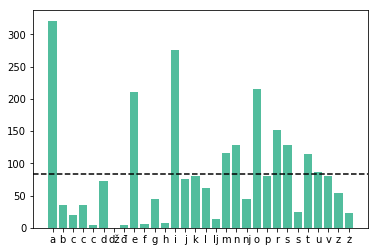

In [19]:
plt.bar(range(len(alphabet_rs)),zastupljenost_slova_rs.values(),color='#52BD9D')
plt.xticks(range(len(alphabet_rs)),zastupljenost_slova_rs.keys())
plt.axhline(y = sum(zastupljenost_slova_rs.values())/len(alphabet_rs),color = 'black',linestyle='dashed')
plt.show()

Видимо неке од разлика између ова два графика (на пример, у енглеском језикз је најпопуларније слово Е, на српском А), али да бисмо их лакше упоредили на у осу ћемо уместо укупног броја појављивања слова унети проценат текста који чини дато слово, зато што знамо да се ови текстови разликују по дужини.

In [20]:
total_en = sum(zastupljenost_slova_en.values())
zastupljenost_slova_en = {ch:100 * zastupljenost_slova_en[ch]/total_en for ch in zastupljenost_slova_en.keys()}

total_rs = sum(zastupljenost_slova_rs.values())
zastupljenost_slova_rs = {ch:100 * zastupljenost_slova_rs[ch]/total_rs for ch in zastupljenost_slova_rs.keys()}

Графике за два различита језика можемо представити упоредно на следећи начин користећи функцију **subplot**. За лакше поређење ова два графика дефинисали смо исти опсег у осе за оба и додали смо као и раније хоризонталне линије да означе просечну заступљеност слова:

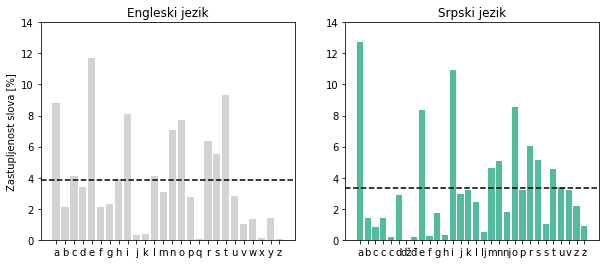

In [21]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(range(len(alphabet_en)),zastupljenost_slova_en.values(),color='lightgrey')
plt.xticks(range(len(alphabet_en)),zastupljenost_slova_en.keys())
plt.ylim([0,14])
avg_frequency = sum(zastupljenost_slova_en.values())/len(alphabet_en)
plt.axhline(y = avg_frequency,color = 'black',linestyle='dashed')
plt.ylabel('Zastupljenost slova [%]')
plt.title('Engleski jezik')

plt.subplot(1,2,2)
plt.bar(range(len(alphabet_rs)),zastupljenost_slova_rs.values(),color='#52BD9D')
plt.xticks(range(len(alphabet_rs)),zastupljenost_slova_rs.keys())
plt.ylim([0,14])
avg_frequency = sum(zastupljenost_slova_rs.values())/len(alphabet_rs)
plt.axhline(y = avg_frequency,color = 'black',linestyle='dashed')
plt.title('Srpski jezik')

plt.show()

А можемо податке представити и на истом дијаграму тако што ћемо се фокусирати само на слова која се појављују у оба језика:

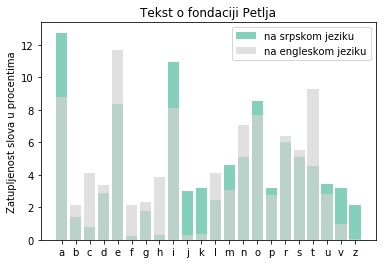

In [22]:
zajednickaslova='abcdefghijklmnoprstuvz'

plt.bar(range(len(zajednickaslova)),[zastupljenost_slova_rs[k] for k in zajednickaslova],alpha=0.7,label='na srpskom jeziku',color='#52BD9D');
plt.bar(range(len(zajednickaslova)),[zastupljenost_slova_en[k] for k in zajednickaslova],alpha=0.7,label='na engleskom jeziku',color='lightgrey');

plt.xticks(range(len(zajednickaslova)),[zajednickaslova[i] for i in range(len(zajednickaslova))]);
plt.ylabel('Zatupljenost slova u procentima')
plt.title('Tekst o fondaciji Petlja')
plt.legend()
plt.show()

Чињеница да сe учесталост појединих слова у тексту разликује била је врло корисна за дешифровање текстова у раном периоду криптографије (погледати Цезарову шифру или генералније моноалфабетску супституцију). А информација коју смо добили са претходног графика (да су поједина слова различито популарна на различитим језицима) била је од користи за имплементацију једноставних алгоритама за детекцију језика на коме је текст написан. Наравно како постоје изузеци, као на пример [овај](https://en.wikipedia.org/wiki/Gadsby_(novel)), овакви алгоритми су превазиђени.

## Зипфов закон

Претходно смо видели да се одређене речи у тексту појављују више пута, па ћемо у наставку ћемо детаљније истражити популарност (број понављања) речи у издвојеним текстовима. 

Веза између ранга речи (позицији речи на ранг листи најпопуларнијих у тексту) и броја појављивања, односно заступљености (фреквенције речи) у тексту, често се назива Зипфов закон. Очигледно је да речи са већим рангом имају нижу фреквенцију, међутим закон каже да је фреквенција речи у тексту обрнуто сразмерна њеном рангу. Хајде да проверимо да ли то важи на анализираним текстовима:

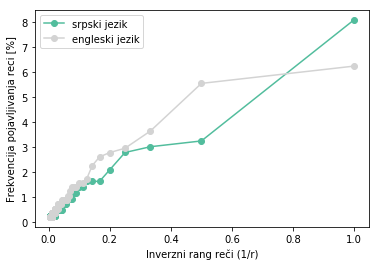

In [23]:
inverzni_rang_rs = [1/r for r in range(1,len(jedinstvene_reci_rs)+1)]
inverzni_rang_en = [1/r for r in range(1,len(jedinstvene_reci_en)+1)]

frek_reci_en = 100*jedinstvene_reci_en['Broj_pojavljivanja_reci']/jedinstvene_reci_en['Broj_pojavljivanja_reci'].sum()
frek_reci_rs = 100*jedinstvene_reci_rs['Broj_pojavljivanja_reci']/jedinstvene_reci_rs['Broj_pojavljivanja_reci'].sum()

plt.plot(inverzni_rang_rs,frek_reci_rs,marker='o',color='#52BD9D',label = 'srpski jezik')
plt.plot(inverzni_rang_en,frek_reci_en, marker='o',color='lightgrey',label = 'engleski jezik')
plt.xlabel('Inverzni rang reči (1/r)')
plt.ylabel('Frekvencija pojavljivanja reci [%]')
plt.legend()
plt.show()

Видимо да фреквенција расте са порастом $1/r$, али није јасно да је линеарна (можда само за речи нижег ранга, доњи леви угао). Може бити да је одсуство ове законитости последица кратких текстова које анализирамо (оба имају само по пар стотина речи). Погледајмо да ли је ова веза уочљивија у дужем тексту - књизи Ана Карењина.

Слично као и са текстовима о Петљи, и текст књиге Ана Карењина (на енглеском језику) смо учитали и припремили у посебној радној свесци (нађите је у фолдеру *data*) а овде ћемо само учитати листу речи као табелу да бисмо на овој знатно већој количини текста проверили да ли важи Зипфов закон.

In [28]:
Ana_df = pd.read_csv('data/tekst data/Ana_df.csv')
Ana_df.head(2)

,Rec
0,Happy
1,families


In [29]:
Ana_df['Rec_malim_slovima'] = Ana_df['Rec'].apply(str.lower)
Ana_df.head(2)

,Rec,Rec_malim_slovima
0,Happy,happy
1,families,families


Сада ћемо број понављања сваке од речи. Раније смо то радили користећи функцију **value_counts**, али да бисмо демонстрирали и друге начине овде ћемо то урадити груписањем по речима (**groupby**), а затим користећи функцију **size** ћемо добити величину сваке групе по истој речи. Ове две функције нам враћају практично исти исход, али је неретко начин који сад примењујемо бржи:

In [30]:
Ana_jedinstvene_reci = pd.DataFrame(Ana_df.groupby('Rec_malim_slovima').size())
Ana_jedinstvene_reci = Ana_jedinstvene_reci.rename(columns={0:'Broj_pojavljivanja'})
Ana_jedinstvene_reci.head()

,Broj_pojavljivanja
Rec_malim_slovima,
a,6163
abandon,6
abandoned,11
abandonment,1
abasement,1


Сортирајмо ову табелу и погледајмо првих 10 најфреквентнијих речи:

In [31]:
Ana_jedinstvene_reci = Ana_jedinstvene_reci.sort_values(by='Broj_pojavljivanja',ascending=False)
Ana_jedinstvene_reci[:10]

,Broj_pojavljivanja
Rec_malim_slovima,
the,17557
and,12906
to,10154
of,8618
he,7836
a,6163
in,6020
that,5546
was,5308


Као што смо претходно поменули, Зипфов закон предвиђа да је фреквенција речи у тексту обрнуто пропорционална рангу речи. Овде ћемо проверити тај закон на тексту књиге Ана Карењина, али ћемо пробати да проверимо закон претпостављајући следећу функционалну зависност $f(r)\propto r^\alpha$ и проверавајући да ли је $\alpha=-1$.
За почетак ћемо у табелу *Ana_jedinstvene_reci* додати колону ранг речи и нормирану фреквенцу (подељену са укупним бројем речи).

In [32]:
total = sum(Ana_jedinstvene_reci['Broj_pojavljivanja'])
Ana_jedinstvene_reci['Frekcencija'] = Ana_jedinstvene_reci['Broj_pojavljivanja']/total
Ana_jedinstvene_reci['Rang'] = [i for i in range(1,len(Ana_jedinstvene_reci)+1,1)]
Ana_jedinstvene_reci.head(2)

,Broj_pojavljivanja,Frekcencija,Rang
Rec_malim_slovima,,,
the,17557,0.049040,1
and,12906,0.036049,2


Хајде сада да нацртамо на графику све речи користећи њихов ранг као х координату а фреквенцију као у координату:

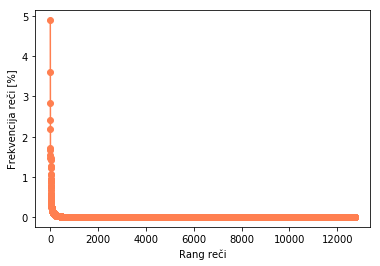

In [33]:
plt.plot(Ana_jedinstvene_reci['Rang'],100*Ana_jedinstvene_reci['Frekcencija'], marker = 'o',color='coral')
plt.xlabel('Rang reči')
plt.ylabel('Frekvencija reči [%]')
#plt.xlim([0,100])
plt.show()

Иако са ове слике видимо да фреквенција јако брзо опада са порастом ранга, није лако проверити да ли је у питању степена зависност и ако јесте која (користећи линију кода која је у коментару, можете ограничити опсег х-осе и проверити колико брзо фреквенца речи падне на вредност јако блиску нули). Стога се за проверу оваквих - степених - зависности ( $f(r)\propto r^\alpha$)) најчешће користи логаритамска функција. 

*Подсетник*: Логаритам је функција која нам даје одговор ако се питамо на који степен треба подићи ранг да би се добила фреквенција речи у тексту. Или на пример $\log_5(625)$ нам даје одговор на питање на који је степен потребно подићи $5$ да би се добило $625$. Одговор је 4 зато што је $5^4=625$. Из ове практичне дефиниције логаритамске функције следе различите особине због којих је згодна за коришћење, нама тренутно значајна: $\log_{baza}(a^c)=c\log_{baza}(a)$. Последње правило важи за логаритам са било којом основом, али ћемо ми најчешће за основу користити е (тај, природни логаритам се онда често означава и са $\ln$) и означаваћемо га само са $\log$ пошто је под тим називом имплементирана и функција **log** у *numpy* библиотеци.

Управо је последња особина логаритамске функције оно што нам може помоћи у емпиријском испитивању степене зависности Зипфовог закона. Ако важи наша предпставка да је $f=r^\alpha$ онда логаритмовање обе стране ове једнакости води до: $\log(f) = \alpha \log(r)$. Сада ако наше податке представимо на графику тако што уместо ранга и фреквенције на х и у оси буду логаритми тих вредности $(\log(r),\log(f))$ међу тачкама очекујемо линеарну зависност, односно праву линију:

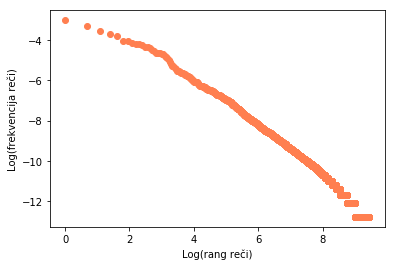

In [34]:
plt.plot(np.log(Ana_jedinstvene_reci['Rang']),np.log(Ana_jedinstvene_reci['Frekcencija']), 'o',color='coral')
plt.xlabel('Log(rang reči)')
plt.ylabel('Log(frekvencija reči)')
plt.show()

Овај график приказује зависност која не делује у потпуности као права линија, али потребно је да направимо оцену линеарности ових података која није одокативна. Да то урадимо, *фитоваћемо* ове податке правом линијом, односно, наћи ћемо најбољу линију која одговара овим подацима.
То ћемо урадити користећи функцијз **polyfit** у оквиру *numpy*. Ова функција испробава различите праве линије $y = \alpha*x +\beta$ мењајући коефицијент правца $\alpha$ и дужину одсечка $\beta$ и враћа нам комбинацију коефицијената која најбоље описује податке. *Најбољи опис података* значи да је удаљеност између у-координате података и вредности која лежи на пронађеној правој линији најмања.

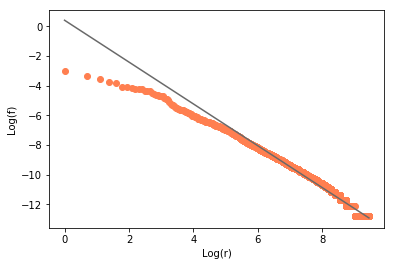

In [35]:
x = np.log(Ana_jedinstvene_reci['Rang'])
y = np.log(Ana_jedinstvene_reci['Frekcencija'])

plt.plot(x,y,'o',color='coral')#исти график као претходни
alpha,beta = np.polyfit(x,y,1)
plt.plot(x,x*alpha+beta,'dimgrey')

plt.xlabel('Log(r)')
plt.ylabel('Log(f)')

plt.show()

Видимо да један део података прати праву линију (мање фреквентне речи), али не можемо да кажемо да за целу књигу, тј. све речи у њој, важи степена зависност између фреквенције речи и ранга. Али хајде да видимо који степен смо на овај начин нашли, тј. на који степен треба подићи ранг да бисмо добили приближну вредност фреквенције:

In [36]:
alpha

-1.4101291190461713

Иако речи у књизи Ана Карењина не прате у потпуности Зипфов закон, свакако смо приметили да је мали број речи изузетно попуаран (скоро 5% књиге написано је уз помоћ само једне, најпопуларније речи, члана *the*!). Хајде да искористимо ово запажање и да у наставку потражимо најпопуларније речи уз помоћ којих је написано 50% књиге.

Додаћемо још једну колону у којој ће бити садржане кумулативне фреквенције, односно крећући се кроз ранг листу речи од најпопуларније на даље, ова колона даће нам за реч у реду *r* који проценат књиге написан је са првих *r* рангираних речи. То моћемо урадити користећи функцију **cumsum**:

In [37]:
Ana_jedinstvene_reci['Kumulativne frekvencije'] = 100*np.cumsum(Ana_jedinstvene_reci['Frekcencija'])

Последња вредност у овој колони је, наравно, 100% (проверите). Хајде да нацртамо ову колону и да видимо отприлике колико нам речи треба за 50% књиге:

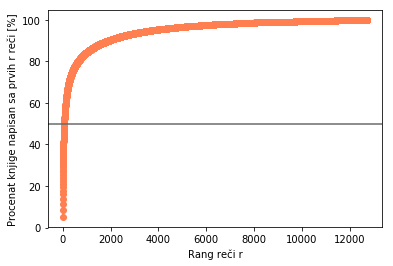

In [38]:
plt.plot(Ana_jedinstvene_reci['Rang'],Ana_jedinstvene_reci['Kumulativne frekvencije'], marker = 'o',color='coral')
plt.xlabel('Rang reči r')
plt.ylabel('Procenat knjige napisan sa prvih r reči [%]')
plt.axhline(y=50,color='dimgrey')
plt.show()

Са овог графика делује да је врло мало речи потребно за 50% укупног садржаја. Селектоваћемо сада из табеле колико је то тачно речи и које су оне:

In [39]:
Ana_jedinstvene_reci[Ana_jedinstvene_reci['Kumulativne frekvencije']<=50]

,Broj_pojavljivanja,Frekcencija,Rang,Kumulativne frekvencije
Rec_malim_slovima,,,,
the,17557,0.049040,1,4.904026
and,12906,0.036049,2,8.508933
to,10154,0.028362,3,11.345150
of,8618,0.024072,4,13.752332
he,7836,0.021888,5,15.941086
a,6163,0.017215,6,17.662536
in,6020,0.016815,7,19.344044
that,5546,0.015491,8,20.893154
was,5308,0.014826,9,22.375786


Са 57 најфреквентнијих речи можемо написати скоро 50% укупних речи које чине књигу Ана Карењина. Хајде да у листу додамо и 58-у реч тако да пређемо ову границу од 50% и хајде да видимо све ове речи заједно:

In [40]:
polovina_knjige = Ana_jedinstvene_reci[Ana_jedinstvene_reci['Rang']<=58].index

In [41]:
razmak.join(polovina_knjige)

'the and to of he a in that was his her it i she had with not s you him but at said for as on all what be levin so is t this up from have they were one there no me by which been would out could when did now vronsky them do anna who how'

*Пробајте да конструишете најдужу смислену реченицу користећи речи са ове листе.*

50% књиге из осам делова и преко 200 поглавља можемо написати са само 58 речи!
Елиминишући популарне речи, видимо да се међу пар десетина најфреквентнијих речи у тексту налазе и имена три главна јунака (Љевин, Вронски и Ана, енг. Levin, Vronsky, Anna)!

У овој радној свесци користили смо приступ фреквенционе анализе, који се упркос својој једноставности показао веома успешно у детектовању главних јунака, кључних речи у кратком тексту и слично. Међутим, до сада коришћени метод је различите граматичке облике исте речи сматрао различитим речима. Постоје нечини да се ово превазиђе, потражите на пример нешто више о процедурама *stemming/lemmatization* (нису једнако добре за све језике али могу помоћи да се ови проблеми мало ублаже).

У ери алгоритама пре машинског учења, велики број метода за детекцију емоција у тексту, екстракцију кључних речи и слично, били су базирани управо на неким сличним идејама које смо у овој свесци обрађивали. Једна велика ствар коју овакве анализе занемарују је контекст у коме су дате речи искоришћене. Ми смо само бројали појављивања речи занемарујући њихову позицију у тексту и/ли међусовне односе, овај приступ се зато често назива 'bag of words' приступ и иако нам је помогао да издвојимо главне јунаке књиге или кључну реч у примеру текста са веба, она има своје лимите. У следећој радној свесци потражићемо мало више информација о тексту узимајући у обзир позицију речи у тексту.

## Задаци

1. На првом графику у овој радној свесци смо упоредили број речи различите дужине текстова на српском и енглеском. Касније смо показали да та листа речи (па и њихових дужина) садржи вишеструка понављања речи. Ваш задатак је да поновите исту анализу и нацртате график, овај пут користећи само листу јединствених речи и њихових дужина за оба текста.

2. Нацртајте график log(фреквенција речи) од log(ранг речи) за текстове са портала Петља на српском и енглеском и користећи функцију за фитовање, проверити у којој мери Зипфов закон важи за ове текстове, као и да ли су степени за различите језике слични.